# Customer Segmentation

### Probelm Statement
- The objective of the Customer Segmentation Data Science project is to categorize a company’s customer base into distinct groups in order to deepen understanding of their behaviors and preferences. The current challenge lies in effectively leveraging customer data, which requires thorough collection and cleaning processes.

### In essence, the project seeks to answer the following questions:
- How can we identify meaningful segments within the existing customer data?
- What patterns and trends can be discerned through exploratory data analysis (EDA) to inform these segments?
- How the clustering algorithm K-means, will best categorize customers based on variables like purchasing behavior and demographics?
- How can we validate the relevance of the resulting customer segments to ensure they are actionable for business purposes?
- How can visualizations effectively communicate these segments to stakeholders?
- What tailored recommendations can be made for personalized marketing strategies and product offerings based on the identified segments?

The ultimate goal is to collaborate with stakeholders to implement these strategies and track their effectiveness, thereby driving business growth and improving customer engagement through targeted marketing efforts.

## What is Clustering ?
The task of grouping data points based on their similarity with each other is called Clustering or Cluster Analysis. This method is defined under the branch of Unsupervised Learning, which aims at gaining insights from unlabelled data points, that is, unlike supervised learning we don’t have a target variable. 

## Workflow
### Dataset -> Pre-Processing -> Data Analysis -> WCSS (optimum no. of clusters)
### WCSS -> K-Means Clustering -> Visualization -> END

In [9]:
# Importing the dependencies 

import numpy as np                   # To work with numpy arrays
import pandas as pd                  # To work with structured data such as dataframe
import matplotlib.pyplot as plt      # For plotting graphs
import seaborn as sns                # For plotting 
from sklearn.cluster import KMeans   # To use K-means cluster algo

### Data Collection and Understanding it's structure

In [12]:
# Importing data from csv file to a pandas data frame
cust_data = pd.read_csv('Mall_Customers.csv')

In [14]:
# Printing first 5 rows of data frame
cust_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# Printing first 5 rows of data frame
cust_data.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [19]:
# Finding shape of dataframe (rows X cols)
print(cust_data.shape)

(200, 5)


In [21]:
# Getting info of data
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
# Let's check for missing values in data
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

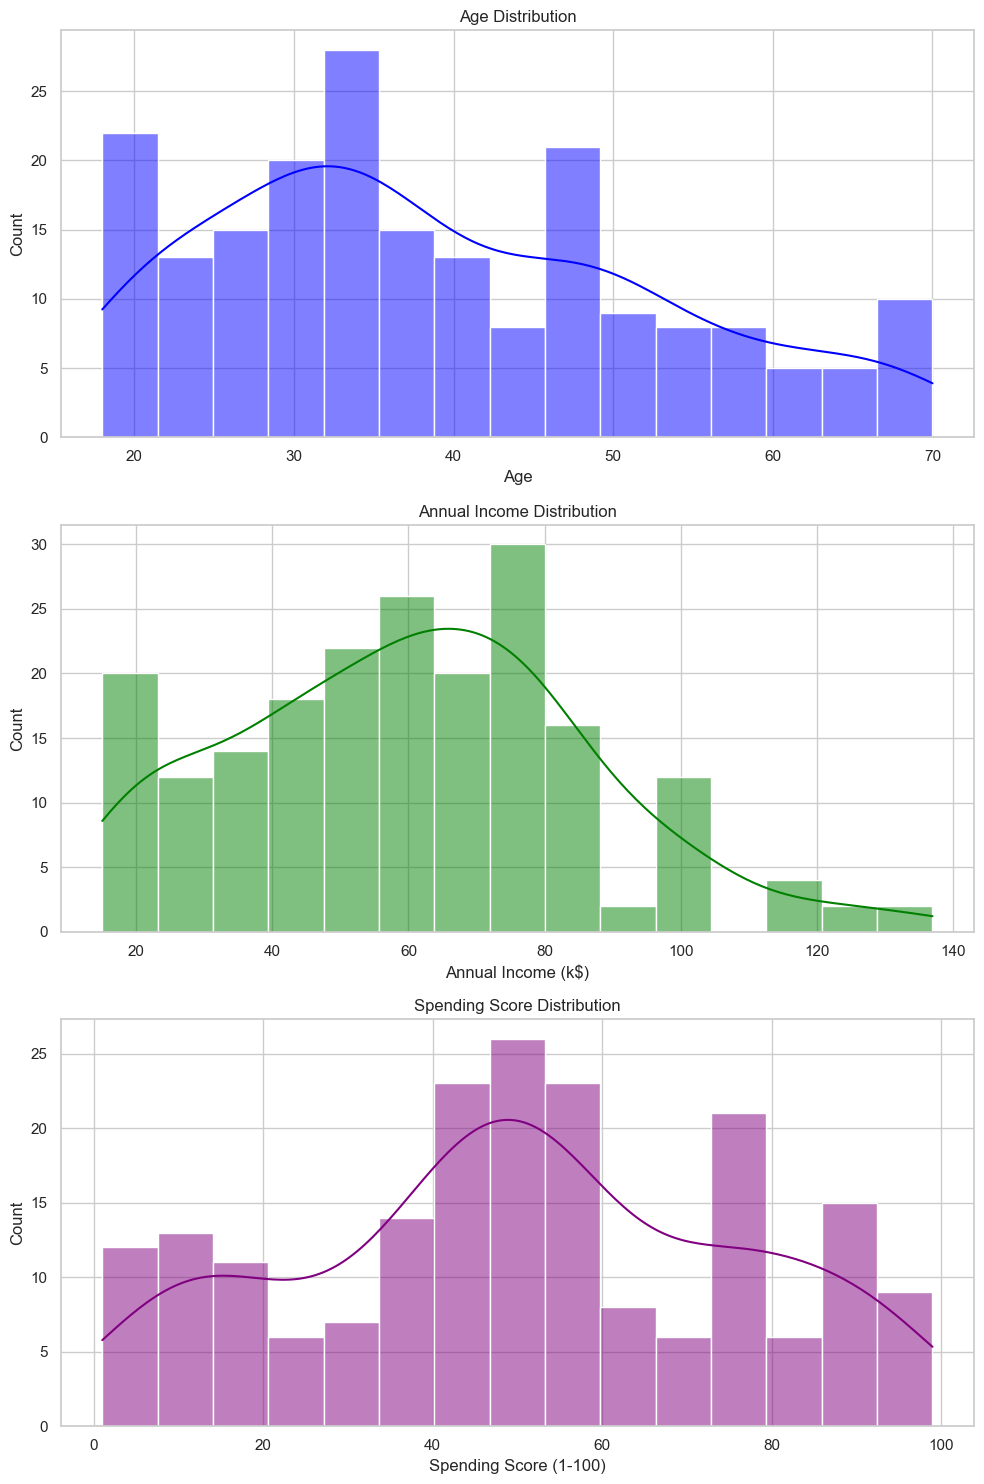

In [49]:
# Set the style for seaborn  
sns.set(style="whitegrid")  

# Histograms for Age, Annual Income, and Spending Score  
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  

sns.histplot(cust_data['Age'], bins=15, kde=True, ax=axs[0], color='blue')  
axs[0].set_title('Age Distribution')  

sns.histplot(cust_data['Annual Income (k$)'], bins=15, kde=True, ax=axs[1], color='green')  
axs[1].set_title('Annual Income Distribution')  

sns.histplot(cust_data['Spending Score (1-100)'], bins=15, kde=True, ax=axs[2], color='purple')  
axs[2].set_title('Spending Score Distribution')  

plt.tight_layout()  
plt.show()  

In [50]:
# Summary Statistics  
summary_stats = cust_data[['Annual Income (k$)', 'Spending Score (1-100)']].describe()  
print(summary_stats) 

       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


### Choosing the Annual Income and Spending Score Column for further analusis

In [39]:
X = cust_data.iloc[:, [3, 4]].values

In [40]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Choosing correct numbner of clusters

In [41]:
# Finding WCSS values for making clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

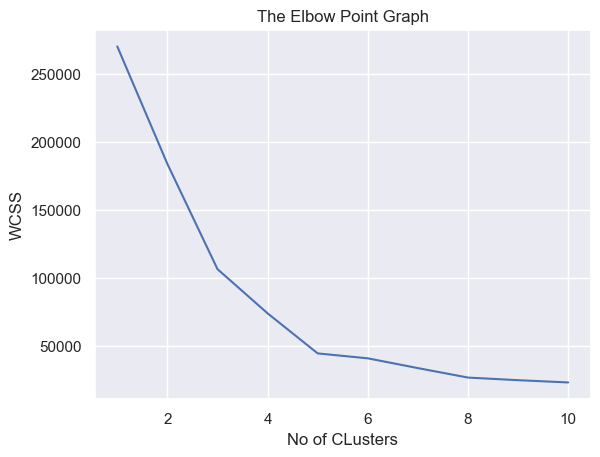

In [42]:
# Plotting the elbow graph for WCSS
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("No of CLusters")
plt.ylabel("WCSS")
plt.show()

### Optimum No of clusters = 5

In [45]:
# Training the k means clustering model
kmeans = KMeans(n_clusters=5,init='k-means++',random_state = 0)

# Return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Visualising all the clusters

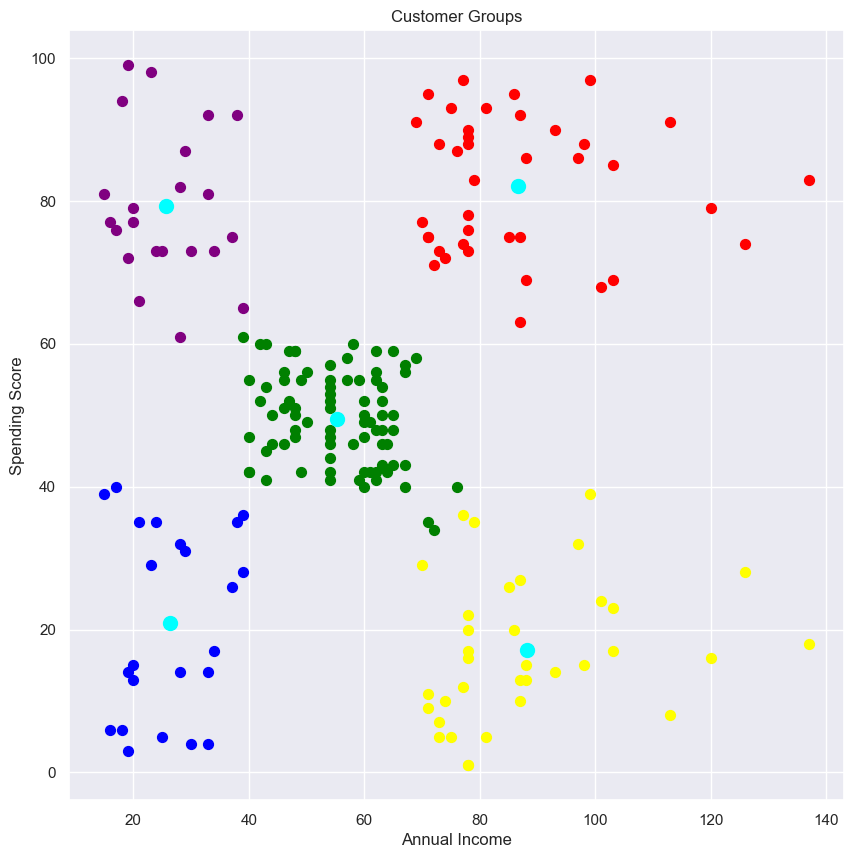

In [47]:
# Plotting all the clusters
plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0], X[Y==0,1],s=50,c='green',label = 'Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1],s=50,c='red',label = 'Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1],s=50,c='yellow',label = 'Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1],s=50,c='blue',label = 'Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1],s=50,c='purple',label = 'Cluster5')

# Plotting the centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color = 'cyan',label='Centroids')
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


### The analysis revealed several distinct customer segments based on Annual Income and Spending Score. The segments can be summarized as follows:
- High-income, high-spending: Customers in this group tend to have a high annual income and a high spending score. They are likely premium customers with a propensity for luxury products.
- High-income, low-spending : This group represents a unique opportunity for targeted marketing strategies, as they may not be fully capitalizing on their income potential in terms of spending on products or services.
- Low-income, high-spending: This segment consists of customers with lower income levels but relatively high spending scores. They may prioritize spending on specific categories, indicating a potential market for targeted promotions.
- Middle-income, average-spending: Customers in this group show moderate levels of both income and spending, representing a stable target for general marketing efforts.
- Low-income, low-spending: This segment includes budget-conscious customers who might be less responsive to promotions aimed at high-ticket items.